# 1. Random walks

In [31]:
import random


def generate_random_walks(graph, walks_per_vertex, walk_length):
    walks = []
    nodes = list(graph.nodes())
    for _ in range(walks_per_vertex):
        random.shuffle(nodes)
        for node in nodes:
            walk = [node]
            for _ in range(walk_length - 1):
                neighbors = list(graph.neighbors(walk[-1]))
                if neighbors:
                    walk.append(random.choice(neighbors))
                else:
                    break
            walks.append(walk)
    return walks

## Example: Generate random walks of length 10 iterating over the vertex set 10 times

In [32]:
import networkx as nx

G = nx.karate_club_graph()

ex_random_walks = generate_random_walks(G, walks_per_vertex=1, walk_length=10)
ex_random_walks

[[11, 0, 1, 2, 0, 12, 3, 2, 8, 33],
 [15, 33, 22, 32, 22, 32, 14, 32, 23, 33],
 [21, 0, 10, 4, 6, 5, 6, 4, 6, 0],
 [22, 32, 29, 33, 23, 32, 2, 1, 21, 1],
 [5, 0, 11, 0, 31, 0, 4, 6, 0, 7],
 [14, 32, 22, 33, 22, 33, 28, 31, 32, 22],
 [4, 0, 19, 0, 2, 27, 33, 32, 18, 33],
 [28, 31, 25, 23, 27, 23, 32, 33, 30, 1],
 [17, 1, 0, 19, 1, 7, 0, 6, 0, 17],
 [19, 33, 19, 0, 6, 16, 6, 5, 10, 0],
 [16, 6, 16, 5, 6, 0, 21, 0, 17, 0],
 [3, 0, 13, 2, 27, 33, 20, 33, 9, 33],
 [25, 31, 28, 2, 27, 33, 27, 2, 28, 31],
 [32, 30, 33, 13, 33, 18, 32, 30, 33, 20],
 [7, 3, 2, 28, 33, 13, 1, 17, 0, 3],
 [1, 2, 28, 2, 3, 1, 7, 1, 0, 4],
 [33, 18, 33, 14, 33, 20, 33, 8, 0, 5],
 [27, 33, 9, 2, 9, 33, 29, 23, 27, 24],
 [30, 1, 13, 2, 1, 17, 1, 0, 1, 2],
 [20, 32, 18, 33, 30, 32, 23, 25, 24, 27],
 [31, 25, 24, 31, 33, 27, 24, 31, 28, 31],
 [29, 33, 27, 23, 27, 2, 7, 1, 19, 33],
 [10, 5, 10, 4, 6, 16, 6, 5, 6, 0],
 [0, 13, 33, 13, 2, 32, 22, 32, 23, 27],
 [12, 3, 13, 3, 7, 2, 32, 22, 32, 33],
 [23, 32, 23, 27, 2, 9, 

# 2. Implement and train CBOW model

## 2.1. Implement CBOW model

In [33]:
import torch.nn as nn


class CBOW(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(CBOW, self).__init__()
        self.embeddings = nn.Embedding(num_embeddings=vocab_size, embedding_dim=embedding_dim)
        self.linear = nn.Linear(in_features=embedding_dim, out_features=vocab_size)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, context):
        embedded = self.embeddings(context)
        context_mean = embedded.mean(dim=1)
        out = self.linear(context_mean)
        return self.softmax(out)

## 2.2. Generate training samples (tuples with context and target for each node)

In [34]:
def generate_training_samples(walks, window_size):
    samples = []
    half_window = (window_size - 1) // 2
    for walk in walks:
        for i in range(half_window, len(walk) - half_window):
            context = (
                    walk[i - half_window:i] + walk[i + 1:i + 1 + half_window]
            )
            target = walk[i]
            samples.append((context, target))
    return samples

In [35]:
generate_training_samples(ex_random_walks, window_size=4)

[([11, 1], 0),
 ([0, 2], 1),
 ([1, 0], 2),
 ([2, 12], 0),
 ([0, 3], 12),
 ([12, 2], 3),
 ([3, 8], 2),
 ([2, 33], 8),
 ([15, 22], 33),
 ([33, 32], 22),
 ([22, 22], 32),
 ([32, 32], 22),
 ([22, 14], 32),
 ([32, 32], 14),
 ([14, 23], 32),
 ([32, 33], 23),
 ([21, 10], 0),
 ([0, 4], 10),
 ([10, 6], 4),
 ([4, 5], 6),
 ([6, 6], 5),
 ([5, 4], 6),
 ([6, 6], 4),
 ([4, 0], 6),
 ([22, 29], 32),
 ([32, 33], 29),
 ([29, 23], 33),
 ([33, 32], 23),
 ([23, 2], 32),
 ([32, 1], 2),
 ([2, 21], 1),
 ([1, 1], 21),
 ([5, 11], 0),
 ([0, 0], 11),
 ([11, 31], 0),
 ([0, 0], 31),
 ([31, 4], 0),
 ([0, 6], 4),
 ([4, 0], 6),
 ([6, 7], 0),
 ([14, 22], 32),
 ([32, 33], 22),
 ([22, 22], 33),
 ([33, 33], 22),
 ([22, 28], 33),
 ([33, 31], 28),
 ([28, 32], 31),
 ([31, 22], 32),
 ([4, 19], 0),
 ([0, 0], 19),
 ([19, 2], 0),
 ([0, 27], 2),
 ([2, 33], 27),
 ([27, 32], 33),
 ([33, 18], 32),
 ([32, 33], 18),
 ([28, 25], 31),
 ([31, 23], 25),
 ([25, 27], 23),
 ([23, 23], 27),
 ([27, 32], 23),
 ([23, 33], 32),
 ([32, 30], 33),
 (

## 2.3. Train the CBOW model

In [36]:
import torch
import torch.optim as optim


def train_cbow(graph, walks_per_vertex, walk_length, window_size, embedding_dim, epochs):
    print("Generating random walks...")
    walks = generate_random_walks(graph, walks_per_vertex, walk_length)

    print("Creating training samples...")
    samples = generate_training_samples(walks, window_size)

    nodes = list(graph.nodes())
    vocab_size = len(nodes)
    node_to_idx = {node: idx for idx, node in enumerate(nodes)}
    idx_to_node = {idx: node for node, idx in node_to_idx.items()}

    indexed_samples = [
        ([node_to_idx[node] for node in context], node_to_idx[target])
        for context, target in samples
    ]

    model = CBOW(vocab_size, embedding_dim)
    loss_fn = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters())

    print("Training CBOW model...")
    for epoch in range(epochs):
        for context, target in indexed_samples:
            context_tensor = torch.tensor(context, dtype=torch.long).unsqueeze(0)
            target_tensor = torch.tensor([target], dtype=torch.long)

            # Forward pass
            output = model(context_tensor)
            loss = loss_fn(output, target_tensor)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        print(f"Epoch {epoch + 1}/{epochs}")

    embeddings = model.embeddings.weight.detach().numpy()
    return {idx_to_node[idx]: embeddings[idx] for idx in range(vocab_size)}

# 3. Use Deepwalk on the Zachary Karate Club graph

## 3.1. Configuration parameters for Deepwalk

In [37]:
walks_per_vertex = 10
walk_length = 10
window_size = 4
embedding_dim = 64
epochs = 10

## 3.2. Run the model

In [38]:
import networkx as nx

G = nx.karate_club_graph()

embeddings = train_cbow(
    graph=G,
    walks_per_vertex=walks_per_vertex,
    walk_length=walk_length,
    window_size=window_size,
    embedding_dim=embedding_dim,
    epochs=epochs
)

for node, embedding in list(embeddings.items())[:5]:
    print(f"Node {node}: {embedding[:5]}...")  # Show the first 5 dimensions

Generating random walks...
Creating training samples...
Training CBOW model...
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
Node 0: [-0.5940866 -1.1362841 -0.7955712  1.385723   0.9683595]...
Node 1: [-1.1579769  -0.9907702  -0.17165294  1.5527151  -0.727644  ]...
Node 2: [-0.19416258 -2.308882   -0.7090443  -0.77943176  1.0464908 ]...
Node 3: [-0.8411208   1.2540535   0.29209355 -0.04503462  1.2047598 ]...
Node 4: [-1.3868707 -2.481092  -2.7585576 -0.8491053  1.0002733]...


## 3.3. Convert the embeddings to an np.array

In [39]:
import numpy as np

embedding_list = list(embeddings.values())
embeddings_np = np.array(embedding_list)
embeddings_np

array([[-0.5940866 , -1.1362841 , -0.7955712 , ...,  0.10080135,
        -0.59937435,  0.8871537 ],
       [-1.1579769 , -0.9907702 , -0.17165294, ...,  0.20217977,
         0.6706039 , -0.5775587 ],
       [-0.19416258, -2.308882  , -0.7090443 , ...,  1.2555554 ,
        -0.9622706 ,  0.8479617 ],
       ...,
       [-0.5519694 ,  0.63844174,  0.50599575, ...,  1.0053324 ,
        -0.58208925, -1.301818  ],
       [ 0.9533931 ,  1.9202971 ,  0.76486385, ...,  0.27272233,
        -0.00940287,  0.88559663],
       [ 0.6071821 ,  1.57324   , -0.13611291, ...,  0.48483738,
         0.26539335, -1.8328    ]], shape=(34, 64), dtype=float32)

## 3.4. Use tSNE to reduce the embedding space to 2 dimensions

In [40]:
from sklearn.manifold import TSNE

tsne = TSNE()
X_embedded = tsne.fit_transform(embeddings_np)

X_embedded

array([[ 0.43117142, -0.38645896],
       [ 0.45032468, -0.9377111 ],
       [ 0.34445062, -0.25653967],
       [ 0.17278436, -0.6600156 ],
       [ 0.12040263, -0.28396124],
       [ 0.74814403, -0.4034937 ],
       [-0.13663307, -0.8469175 ],
       [ 0.63561296, -0.16461499],
       [ 0.5577272 , -1.148248  ],
       [ 0.8123037 , -0.40251192],
       [ 1.1251919 , -0.642628  ],
       [ 0.54279155,  0.005013  ],
       [-0.07616258, -0.9377796 ],
       [ 0.3681884 , -0.86809945],
       [ 0.54853815, -0.74889684],
       [ 0.75201917, -0.67702746],
       [ 1.1150619 , -0.6192373 ],
       [ 0.984936  , -0.9084478 ],
       [ 0.6122221 , -1.090701  ],
       [ 0.179958  , -0.23499   ],
       [ 0.3513289 , -1.4541447 ],
       [ 0.69110507, -1.3788825 ],
       [ 0.27296713, -0.88580865],
       [ 0.3707614 , -1.0536455 ],
       [ 1.1602682 , -1.0388913 ],
       [ 0.66248506, -0.7360543 ],
       [-0.13646808, -1.0024214 ],
       [ 0.17117725, -0.4996932 ],
       [ 0.82412857,

## 3.5. Plot the result of tSNE

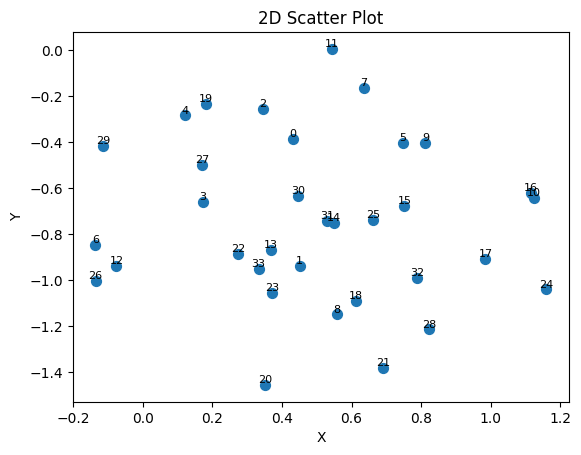

In [41]:
import matplotlib.pyplot as plt

x_coords = [point[0] for point in X_embedded]
y_coords = [point[1] for point in X_embedded]

plt.scatter(x_coords, y_coords, s=50)

for i, point in enumerate(X_embedded):
    plt.text(point[0], point[1], str(i), ha='center', va='bottom', fontsize=8)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Scatter Plot')

plt.show()